<img src="http://www.astropy.org/images/astropy_banner.svg" alt="Drawing" style="width: 400px;"/>

# Introduction à [Astropy](http://www.astropy.org/)

### [Astropy](http://docs.astropy.org/en/stable/)

- Librairie centrale et unique contenant les élément essentiels des analyses pour l'astronomie, et ayant pour but de rendre possible l'inter-operabilité des librairies d'astronomies.
- Les fonctionnalités principales d'astropy se font selon trois catégories principales
  - Data structures and transformations (constantes, unitées, temps, coordonnées, WCS, table, etc)
  - Files, I/O, and Communication (FITS, ASCII, VOTable, HDF5, YAML, etc.)
  - Computations and utilities (cosmologie, astr-statistique, visualisation, convolution, filtering)
- [Documentation en ligne](http://docs.astropy.org/en/stable/)

#### Data structures and transformations

- Constants (astropy.constants)
- Units and Quantities (astropy.units)
- N-dimensional datasets (astropy.nddata)
- Data Tables (astropy.table)
- Time and Dates (astropy.time)
- Astronomical Coordinate Systems (astropy.coordinates)
- World Coordinate System (astropy.wcs)
- Models and Fitting (astropy.modeling)
- Analytic Functions (astropy.analytic_functions)

#### Files, I/O, and Communication

- Unified file read/write interface
- FITS File handling (astropy.io.fits)
- ASCII Tables (astropy.io.ascii)
- VOTable XML handling (astropy.io.votable)
- Miscellaneous: HDF5, YAML, pickle (astropy.io.misc)
- Simple Application Messaging Protocol (astropy.samp)
- Virtual Observatory Access (astropy.vo)

#### Computations and utilities

- Cosmological Calculations (astropy.cosmology)
- Convolution and filtering (astropy.convolution)
- Data Visualization (astropy.visualization)
- Astrostatistics Tools (astropy.stats)

# Exemples

## Units et Quantities

[**units**](http://docs.astropy.org/en/stable/units/) : définition, calcul et convertion d'unités de quantités physiques telles des que mètres, secondes, Hz, decibel, magnitudes, etc.

[**quantity**](http://docs.astropy.org/en/stable/units/quantity.html#quantity) : combinaison d'une valeur et d'une unité forme une quantité

[**constants**](http://docs.astropy.org/en/stable/constants/index.html) : constantes physiques utiles en astronomie.

### Units

In [1]:
from astropy import units as u

In [2]:
dir(u)

['A',
 'AA',
 'ABmag',
 'AU',
 'Angstrom',
 'B',
 'Ba',
 'Barye',
 'Bi',
 'Biot',
 'Bq',
 'C',
 'Celsius',
 'Ci',
 'CompositeUnit',
 'D',
 'Da',
 'Dalton',
 'Debye',
 'Decibel',
 'DecibelUnit',
 'Dex',
 'DexUnit',
 'EA',
 'EAU',
 'EB',
 'EBa',
 'EC',
 'ED',
 'EF',
 'EG',
 'EGal',
 'EH',
 'EHz',
 'EJ',
 'EJy',
 'EK',
 'EL',
 'EN',
 'EOhm',
 'EP',
 'EPa',
 'ER',
 'ERy',
 'ES',
 'ESt',
 'ET',
 'EV',
 'EW',
 'EWb',
 'Ea',
 'Eadu',
 'Earcmin',
 'Earcsec',
 'Eau',
 'Eb',
 'Ebarn',
 'Ebeam',
 'Ebin',
 'Ebit',
 'Ebyte',
 'Ecd',
 'Echan',
 'Ecount',
 'Ect',
 'Ed',
 'Edeg',
 'Edyn',
 'EeV',
 'Eerg',
 'Eg',
 'Eh',
 'EiB',
 'Eib',
 'Eibit',
 'Eibyte',
 'Ek',
 'El',
 'Elm',
 'Elx',
 'Elyr',
 'Em',
 'Emag',
 'Emin',
 'Emol',
 'Eohm',
 'Epc',
 'Eph',
 'Ephoton',
 'Epix',
 'Epixel',
 'Erad',
 'Es',
 'Esr',
 'Eu',
 'Evox',
 'Evoxel',
 'Eyr',
 'F',
 'Farad',
 'Fr',
 'Franklin',
 'FunctionQuantity',
 'FunctionUnitBase',
 'G',
 'GA',
 'GAU',
 'GB',
 'GBa',
 'GC',
 'GD',
 'GF',
 'GG',
 'GGal',
 'GH',
 'GHz

In [3]:
u.lightyear, u.lightyear.physical_type, u.lightyear.long_names

(Unit("lyr"), 'length', ['lightyear'])

### Quantité

Une quantité est créée par la mutliplication d'un nombre par une unité

In [4]:
distance = 3 * u.lightyear
distance

<Quantity 3.0 lyr>

In [5]:
type(distance)

astropy.units.quantity.Quantity

### Conversion

Une quantité peut être convertie d'une unité à une autre

In [6]:
distance.to('meter'), distance.to('pc'), distance.to('au')

(<Quantity 2.83821914177424e+16 m>,
 <Quantity 0.9198041813638581 pc>,
 <Quantity 189723.23125279884 AU>)

In [7]:
from IPython.core.magic import register_line_magic

@register_line_magic
def shorterr(line):
    """Show only the exception message if one is raised."""
    try:
        output = eval(line)
    except Exception as e:
        print("\x1b[31m\x1b[1m{e.__class__.__name__}: {e}\x1b[0m".format(e=e))
    else:
        return output
    
del shorterr

In [8]:
%shorterr distance.to('second')

UnitConversionError: 'lyr' (length) and 's' (time) are not convertible


Le module `units` peut aussi convertir des unités **compatibles dans certains contextes** à l'aide des [`equivalencies`](http://docs.astropy.org/en/stable/units/equivalencies.html)

In [9]:
% shorterr (8.0 * u.arcsec).to(u.parsec)  

UnitConversionError: 'arcsec' (angle) and 'pc' (length) are not convertible


In [10]:
(8.0 * u.arcsec).to(u.parsec, equivalencies=u.parallax())

<Quantity 0.125 pc>

On peut aussi créer des listes de quantités de la même façon

In [11]:
distances = [1, 2, 3] * u.cm

In [12]:
(distances).to('pc')

<Quantity [  3.24077929e-19,  6.48155858e-19,  9.72233787e-19] pc>

In [49]:
type(distances), type(distances.value), distances.mean()

(astropy.units.quantity.Quantity, numpy.ndarray, <Quantity 2.0 cm>)

### Constantes

In [14]:
from astropy import constants as const

In [15]:
print(const.M_sun)

  Name   = Solar mass
  Value  = 1.9884754153381438e+30
  Uncertainty  = 9.236140093538353e+25
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2014


In [16]:
print(const.c)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2014


In [17]:
# temps de parcours de la lumière du Soleil à la Terre
((1 * u.au) / const.c).to('min')

<Quantity 8.316746397269274 min>

## Coordonnées

In [18]:
from astropy.coordinates import SkyCoord
import astropy.units as u

In [19]:
cluster_3C295 = SkyCoord.from_name('3C295')
cluster_3C295

<SkyCoord (ICRS): (ra, dec) in deg
    ( 212.835495,  52.20277)>

In [20]:
cluster_3C295.ra, cluster_3C295.dec

(<Longitude 212.835495 deg>, <Latitude 52.20277 deg>)

In [21]:
cluster_3C295.ra.arcmin, cluster_3C295.dec.degree

(12770.129700000001, 52.20277)

In [22]:
SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.625,  41.2)>

In [23]:
SkyCoord(10.625, 41.2, frame='icrs', unit='deg')

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.625,  41.2)>

In [24]:
SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.625,  41.2)>

In [25]:
SkyCoord('00h42.5m', '+41d12m')

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.625,  41.2)>

In [26]:
SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.625,  41.2)>

In [27]:
SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.625,  41.2)>

# Table

In [28]:
from astropy.table import Table
from astropy import units as u

In [29]:
a = [1, 4, 5] * u.meter
b = [2.0, 5.0, 8.2] * u.arcminute
c = [b'x', b'y', b'z']

In [30]:
t = Table([a, b, c], names=('a', 'b', 'c'), meta={'name': 'first table'})

In [31]:
t.show_in_notebook()

idx,a,b,c
,m,arcmin,
0,1.0,2.0,x
1,4.0,5.0,y
2,5.0,8.2,z


#### Récupérer la première ligne, ou la colonne 'a'

In [32]:
t[0]

a,b,c
m,arcmin,
float64,float64,bytes1
1.0,2.0,x


In [33]:
t['a']
t.columns[0]

1.0
4.0
5.0


In [34]:
t['a'] == t.columns[0]

array([ True,  True,  True], dtype=bool)

#### Ajouter / supprimer une colonne

In [35]:
from astropy.table import Column
t.add_column(Column([[1,2,3], [4,5,6], [7,8,9]] * u.lightyear, name='list', dtype=list))
t

a,b,c,list [3]
m,arcmin,,lyr
float64,float64,bytes1,object
1.0,2.0,x,1.0 .. 3.0
4.0,5.0,y,4.0 .. 6.0
5.0,8.2,z,7.0 .. 9.0


In [36]:
col = t['list']

In [37]:
col.unit, col.data

(Unit("lyr"), array([[1.0, 2.0, 3.0],
        [4.0, 5.0, 6.0],
        [7.0, 8.0, 9.0]], dtype=object))

In [38]:
t.remove_column('list')
t

a,b,c
m,arcmin,
float64,float64,bytes1
1.0,2.0,x
4.0,5.0,y
5.0,8.2,z


#### Appliquer un filtre sur la table

In [39]:
t['b'] > 3

array([False,  True,  True], dtype=bool)

In [40]:
new_tab = t[t['b'] > 3]
new_tab

a,b,c
m,arcmin,
float64,float64,bytes1
4.0,5.0,y
5.0,8.2,z


### Écrire / lire une une table

In [41]:
t.write('matable.dat', format='ascii', overwrite=True)
t.write('matable.fits', format='fits', overwrite=True)
t.write('matable.hdf5', path='premiere_table', overwrite=True)

d = Table.read("matable.dat", format='ascii')
d = Table.read("matable.fits")
d = Table.read('matable.hdf5', path='premiere_table')

In [42]:
d = Table.read('matable.hdf5')  # path='premiere_table')
d.pprint()

 a   b   c 
--- --- ---
1.0 2.0   x
4.0 5.0   y
5.0 8.2   z


## Fichier FITS

In [43]:
# Téléchargement des données en ligne
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits',
                           cache=True)

In [44]:
# Explore la structure du fichier teléchargé grâce à io.fits.info()
from astropy.io import fits
fits.info(image_file)

Filename: /home/chotard/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [45]:
# Récupération des données dans l'extension 0 du fichier fits (Primary HDU)
image_data = fits.getdata(image_file, ext=0)

In [46]:
# L'image est en fait un `numpy array` à 2 dimensions
print(image_data.shape)

(893, 891)


<IPython.core.display.Javascript object>


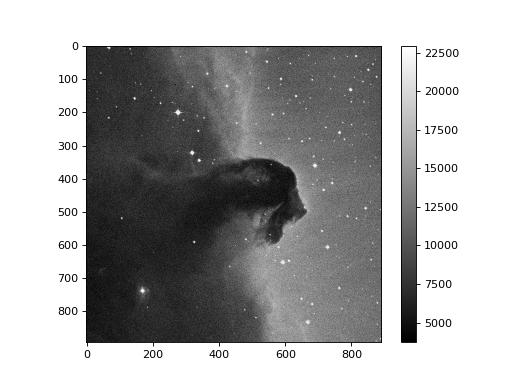

In [47]:
# Visualisation de l'image avec matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()